In [1]:
1+1

2

In [4]:
import numpy as np

import sys
sys.path.append('/data/id01/inhouse/bellec/software/sharedipynb/gitlab/bcdi_eb/Alien_removal_utilities/')
from alien_removal_3D_utilities import *
from plot_utilities import *

# Load and preprocess data

/mnt/multipath-shares/data/id01/inhouse/bellec/local_contact/2022/MA5132_Joussou/BCDI_reconstructions_2023/plot_utilities.py:35: RuntimeWarning: divide by zero encountered in log
  ax[n].imshow(np.log(np.nanmean(data, axis=n)),cmap=cmap, aspect='auto')


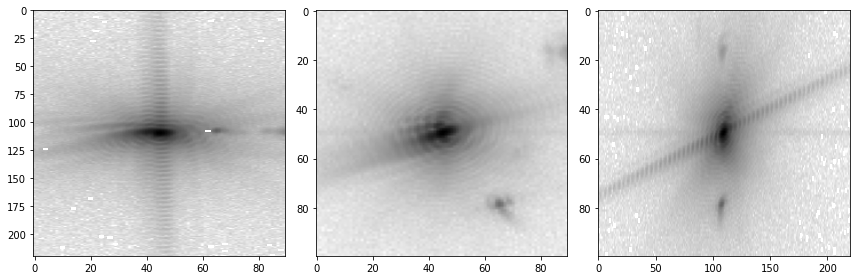

In [24]:
# Load data
# Careful, your BCDI array should already be centered around the Bragg peak.
filename = 'preprocessed_data_Au_pristine/dataset_Au_pristine_BCDI_x1_0010_scan_40.npz'
file = np.load(filename)
data_original = file['data']

# Preprocessed the data
data, data_log = preprocessing(data_original, remove_hot_pixels=True, filter_small_values=True)
plot_3D_projections(data, log_scale=True)

# Mask creation

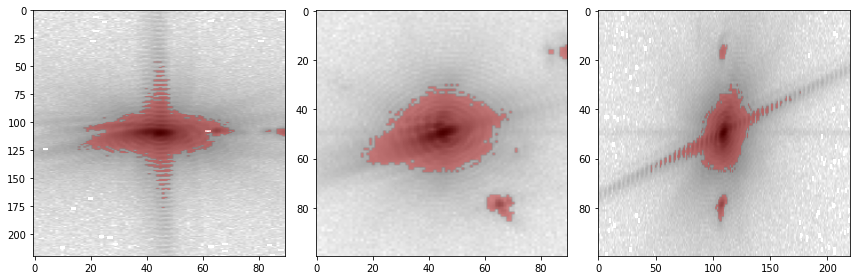

In [25]:
threshold = .25

mask_original = create_intensity_threshold_mask(data_log, threshold, 
                                    plot=True, data=data)

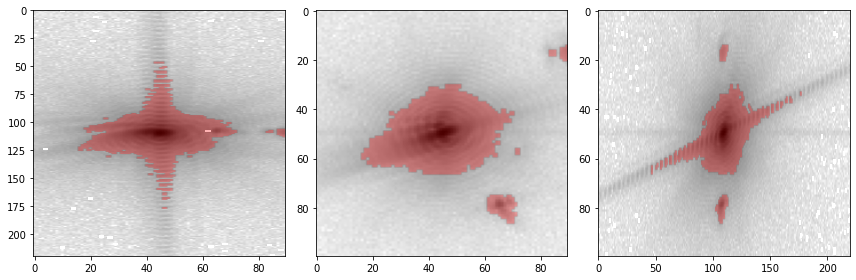

In [26]:
# Mask smoothing using scipy.ndimage.maximum_filter
# Only use smooth_mask=True if the aliens are far enough from the central Bragg !
# size_filter should be around the Bragg fringe spacing (in pixels). 2-5 for typical BCDI data.
# Safest is not to smooth the mask (smooth_mask=False)
# But mask will be better if smoothed.

smooth_mask = True
size_filter = 2

if smooth_mask:
    mask = mask_smoothing(mask_original, size_filter=size_filter, 
                          plot=True, data=data)
else:
    print('no mask smoothing')
    mask = mask_original

# Clustering and user selection

In [27]:
# Create a widget plot.
# Select by hand each of the aliens clusters (just tick the box below the cluster plot)

nb_clusters_kept = 10 # Number of clusters to plot (no need to plot them all)

sorting = 'size' # Choose the sorting algorithm. available are : 'size', 'max', 'asym', 'None'
# 'size' sort from largest to smallest clusters
# 'max' sort by the maximum pixel value inside each cluster
# 'asym' sort using the asymmetry of each cluster
# 'None' no sorting

pixels, pixels_labels, check_list, labels = clustering_and_filtering(mask, data, nb_clusters_kept=nb_clusters_kept, 
                                                                     sorting=sorting)

number of clusters :  20
number of clusters to plot : 10


/mnt/multipath-shares/data/id01/inhouse/bellec/local_contact/2022/MA5132_Joussou/BCDI_reconstructions_2023/plot_utilities.py:35: RuntimeWarning: divide by zero encountered in log
  ax[n].imshow(np.log(np.nanmean(data, axis=n)),cmap=cmap, aspect='auto')


<Figure size 864x288 with 0 Axes>

# Create alien mask

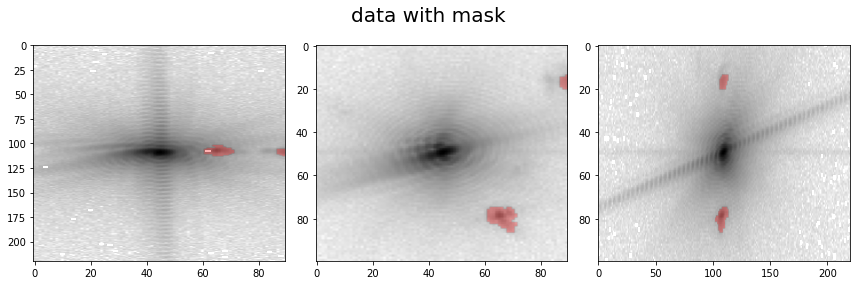

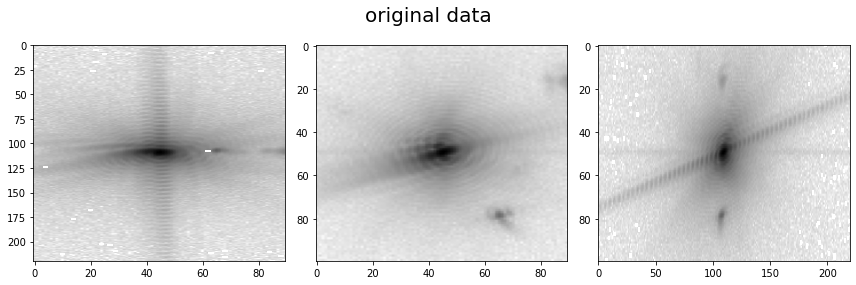

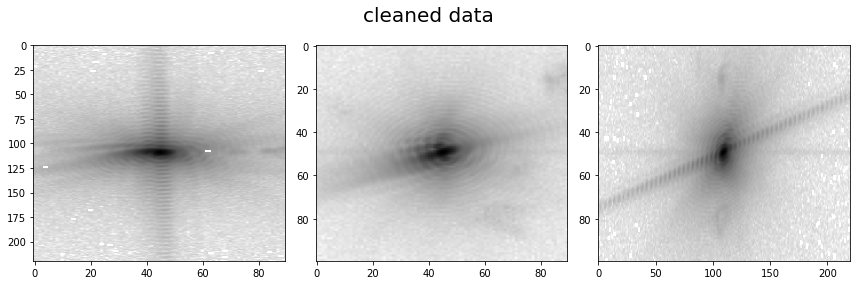

In [28]:
mask_alien = create_mask_from_selected_clusters(data, check_list, pixels, pixels_labels, labels,
                                       plot=True)

data_clean = get_clean_data(data_original, mask_alien,
                            remove_hot_pixels=False, replace_by_zeros=True,
                            plot=True)

# Save the mask

In [29]:
path_save = '{}/clean_data/'.format(filename.split('/')[-2])
# print('path_save : ', path_save)
check_path_create(path_save)

savename = path_save + '{}_clean_data'.format(filename.split('/')[-1][:-4])
print('results saved in : {}.npz'.format(savename))
# np.savez(savename, data_clean=data_clean, mask=mask_alien.astype('int'))
np.savez(savename, mask_alien=mask_alien.astype('int'), **file)

results saved in : preprocessed_data_Au_pristine/clean_data/dataset_Au_pristine_BCDI_x1_0010_scan_40_clean_data.npz


# Appendix : clusters 3D scatter plot

Use the following cells to make a 3D scatter plot of the intensity threshold mask pixels with a different color for each cluster

In [ ]:
pixels = intensity_threshold_pixels(mask)
pixels_labels = pixels_clustering(pixels)

In [ ]:
Nb_pixels_partial = 10000 # not all pixels are taken for the scatter plot. Otherwise it's too heavy
plotly_scatter3D_clusters(pixels, pixels_labels, 
                          Nb_pixels_partial = Nb_pixels_partial,
                          marker_size=1.5)